In [1]:
%pip install opendatasets 
%pip install seaborn
%pip install seaborn matplotlib
%pip install scipy
%pip install keras
%pip install torch

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd 
import opendatasets as od
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import pandas as pd

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd

import pandas as pd  # Importa a biblioteca pandas para manipulação de dados
import torch  # Importa a biblioteca PyTorch
import torch.nn as nn  # Importa o módulo de redes neurais do PyTorch
from sklearn.preprocessing import MinMaxScaler  # Importa o MinMaxScaler para normalização dos dados
from torch.utils.data import DataLoader, TensorDataset  # Importa DataLoader e TensorDataset para manipulação de dados em lotes

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import torch
from torch.utils.data import DataLoader, TensorDataset

import torch
import numpy as np
from sklearn.metrics import accuracy_score
from torch.utils.data import DataLoader, TensorDataset






In [3]:
# Faz o download do dataset # URL do dataset no Kaggle 
# od.download("https://www.kaggle.com/datasets/hassan06/nslkdd/data")

# Pré-Processamento

In [4]:
df_no_label = pd.read_csv("nslkdd/KDDTrain+.txt", header = None)


In [5]:
# adiciona rótulos as colunas 
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'class_type'
,'level'])

# Carregando os conjuntos de dados de treinamento e teste
train_df = pd.read_csv('nslkdd/KDDTrain+.txt', header=None, names=columns)
test_df = pd.read_csv('nslkdd/KDDTest+.txt', header=None, names=columns)

In [6]:
# Concatenando os DataFrames para criar um único DataFrame
df = pd.concat([train_df, test_df], ignore_index=True)

# Exibindo os tamanhos dos conjuntos resultantes
print(f"Tamanho do Conjunto de Dados Completo: {len(df)}")
print(f"Tamanho do Conjunto de Treinamento: {len(train_df)}")
print(f"Tamanho do Conjunto de Teste: {len(test_df)}")

Tamanho do Conjunto de Dados Completo: 148517
Tamanho do Conjunto de Treinamento: 125973
Tamanho do Conjunto de Teste: 22544


In [7]:
print("Conjunto dos dados completos")
df


Conjunto dos dados completos


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class_type,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00,normal,21
148513,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,normal,21
148514,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07,back,15
148515,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148517 entries, 0 to 148516
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     148517 non-null  int64  
 1   protocol_type                148517 non-null  object 
 2   service                      148517 non-null  object 
 3   flag                         148517 non-null  object 
 4   src_bytes                    148517 non-null  int64  
 5   dst_bytes                    148517 non-null  int64  
 6   land                         148517 non-null  int64  
 7   wrong_fragment               148517 non-null  int64  
 8   urgent                       148517 non-null  int64  
 9   hot                          148517 non-null  int64  
 10  num_failed_logins            148517 non-null  int64  
 11  logged_in                    148517 non-null  int64  
 12  num_compromised              148517 non-null  int64  
 13 

In [9]:
df['protocol_type'].value_counts()




protocol_type
tcp     121569
udp      17614
icmp      9334
Name: count, dtype: int64

In [10]:
df['service'].value_counts()


service
http         48191
private      26627
domain_u      9937
smtp          8247
ftp_data      7711
             ...  
tftp_u           4
http_8001        2
aol              2
harvest          2
http_2784        1
Name: count, Length: 70, dtype: int64

In [11]:
df['flag'].value_counts()


flag
SF        89820
S0        36864
REJ       15083
RSTR       3090
RSTO       2335
S1          386
SH          344
S3          298
S2          142
RSTOS0      105
OTH          50
Name: count, dtype: int64

In [12]:
train_df['class_type'].value_counts()


class_type
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64

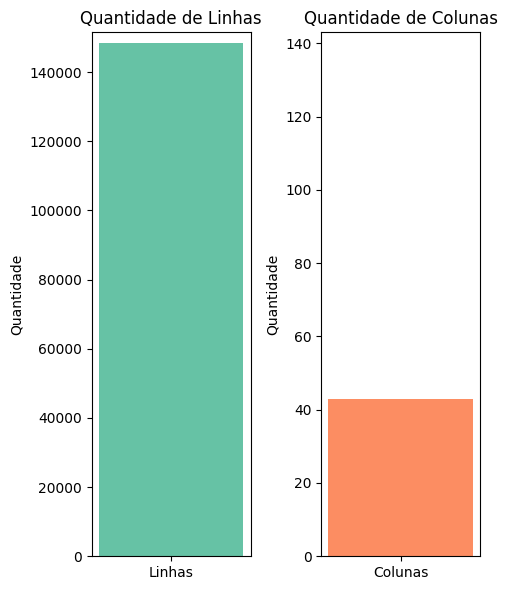

In [13]:
# Obtendo o tamanho do DataFrame
num_rows, num_cols = df.shape

# Criando gráfico de barras para linhas
plt.figure(figsize=(5, 6))

# Gráfico de barras para Linhas
plt.subplot(1, 2, 1)
plt.bar(['Linhas'], [num_rows], color='#66c2a5')
plt.title('Quantidade de Linhas')
plt.ylabel('Quantidade')
plt.ylim(0, num_rows + 3000)  # Ajusta o limite do eixo y para melhor visualização

# Gráfico de barras para Colunas
plt.subplot(1, 2, 2)
plt.bar(['Colunas'], [num_cols], color='#fc8d62')
plt.title('Quantidade de Colunas')
plt.ylabel('Quantidade')
plt.ylim(0, num_cols + 100)  # Ajusta o limite do eixo y para que 43 apareça claramente

# Exibindo os gráficos
plt.tight_layout()  # Ajusta o layout para não sobrepor os gráficos
plt.show()

In [14]:
print("Conjunto de Treinamento")
train_df

Conjunto de Treinamento


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class_type,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [15]:
print("Conjunto de Teste")
test_df

Conjunto de Teste


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class_type,level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22540,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21


In [16]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

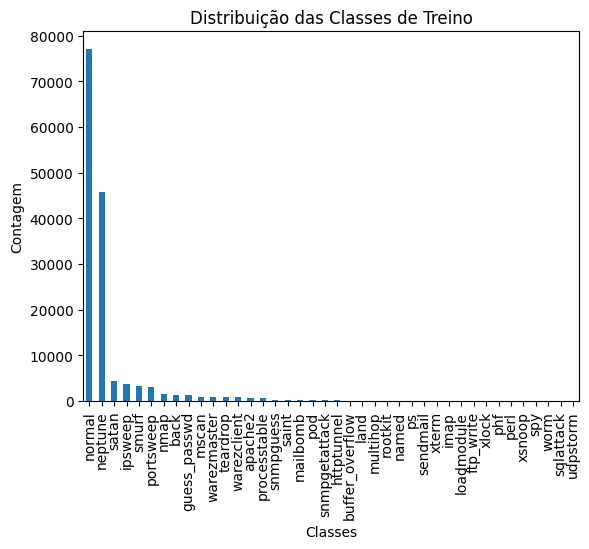

In [17]:
# #distribuição dos dados nas classes 
df["class_type"].value_counts().plot(kind='bar')
plt.title('Distribuição das Classes de Treino')
plt.xlabel('Classes')
plt.ylabel('Contagem')
plt.show()


# Pré Processamento

In [18]:
# Dividindo o conjunto de dados em 70% para treinamento e 30% para teste
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)

In [19]:
train_df['class_type'].value_counts()


class_type
normal             53952
neptune            32085
satan               3086
ipsweep             2650
smurf               2311
portsweep           2209
nmap                1083
back                 905
guess_passwd         890
mscan                686
warezmaster          672
teardrop             628
warezclient          609
apache2              521
processtable         462
snmpguess            228
saint                219
mailbomb             207
pod                  172
snmpgetattack        127
httptunnel            88
buffer_overflow       36
multihop              18
rootkit               17
land                  13
ps                    12
named                 11
ftp_write             10
loadmodule             9
sendmail               9
xterm                  8
imap                   7
phf                    6
xlock                  5
perl                   4
xsnoop                 3
udpstorm               2
sqlattack              1
Name: count, dtype: int64

In [20]:
train_df.class_type=train_df.class_type.apply(lambda x: 0 if x == 'normal' else 1)
train_df['class_type'].value_counts()



class_type
0    53952
1    50009
Name: count, dtype: int64

In [21]:
# Filtrar os dados normais
normal_train_df = train_df[train_df['class_type'] == 0]  # 0 representa 'normal'

# Printar a quantidade de dados que sobraram
print('Quantidade de dados normais restantes:')
normal_train_df['class_type'].value_counts()


Quantidade de dados normais restantes:


class_type
0    53952
Name: count, dtype: int64

In [22]:
# Remover a coluna de rótulo
normal_train_df = normal_train_df.drop(columns=['class_type'])


In [23]:
# Imprimir informações sobre o DataFrame, incluindo os nomes das colunas e a quantidade total de colunas
normal_train_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 53952 entries, 145078 to 121958
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     53952 non-null  int64  
 1   protocol_type                53952 non-null  object 
 2   service                      53952 non-null  object 
 3   flag                         53952 non-null  object 
 4   src_bytes                    53952 non-null  int64  
 5   dst_bytes                    53952 non-null  int64  
 6   land                         53952 non-null  int64  
 7   wrong_fragment               53952 non-null  int64  
 8   urgent                       53952 non-null  int64  
 9   hot                          53952 non-null  int64  
 10  num_failed_logins            53952 non-null  int64  
 11  logged_in                    53952 non-null  int64  
 12  num_compromised              53952 non-null  int64  
 13  root_shell     

In [24]:
normal_train_df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'level'],
      dtype='object')

In [25]:
test_df.class_type=test_df.class_type.apply(lambda x: 0 if x == 'normal' else 1)
test_df['class_type'].value_counts()


class_type
0    23102
1    21454
Name: count, dtype: int64

In [26]:
# Realizando o One-Hot Encoding nas colunas categóricas
normal_train_df = pd.get_dummies(normal_train_df, columns=['protocol_type', 'service', 'flag'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['protocol_type', 'service', 'flag'], drop_first=True)

# Alinhando os DataFrames de treino e teste para garantir que eles tenham as mesmas colunas
train_df, test_df = train_df.align(test_df, join='left', axis=1, fill_value=0)

# Selecionando apenas as colunas numéricas para normalização
numeric_cols = normal_train_df.select_dtypes(include=['float64', 'int64']).columns


# Normalizando os dados numéricos com MinMaxScaler
scaler = MinMaxScaler()
X_train_normal = scaler.fit_transform(normal_train_df[numeric_cols])
X_test = scaler.transform(test_df[numeric_cols])

# Convertendo os dados normalizados para tensores
X_train_tensor_normal = torch.tensor(X_train_normal, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

# Criando o DataLoader para os dados normais 
train_dataset_normal = TensorDataset(X_train_tensor_normal)
train_loader_normal = DataLoader(train_dataset_normal, batch_size=64, shuffle=True)
test_dataset = TensorDataset(X_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


## Treinando o modelo

In [27]:
import torch
import torch.nn as nn


# Definindo as dimensões do modelo
input_dim= X_train_tensor_normal.shape[1]
hidden_dim1 = 256  # Primeira camada oculta
hidden_dim2 = 128  # Segunda camada oculta
latent_dim = 64   # Dimensões na camada latente

loss_values = []

class VAE(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, latent_dim):
        super(VAE, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.fc31 = nn.Linear(hidden_dim2, latent_dim)  # Média da distribuição latente
        self.fc32 = nn.Linear(hidden_dim2, latent_dim)  # Log variância da distribuição latente
        self.fc4 = nn.Linear(latent_dim, hidden_dim2)
        self.fc5 = nn.Linear(hidden_dim2, hidden_dim1)
        self.fc6 = nn.Linear(hidden_dim1, input_dim)

        self.dropout = nn.Dropout(0.3)  # Aumentando a taxa de dropout

    def encode(self, x):
        h1 = torch.relu(self.fc1(x))
        h1 = self.dropout(h1)
        h2 = torch.relu(self.fc2(h1))
        return self.fc31(h2), self.fc32(h2)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        h4 = torch.relu(self.fc4(z))
        h5 = torch.relu(self.fc5(h4))
        return torch.sigmoid(self.fc6(h5))

    def forward(self, x):
        mu, logvar = self.encode(x.view(-1, input_dim))
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar

model = VAE(input_dim, hidden_dim1, hidden_dim2, latent_dim)

# Função de perda usando BCE e KLD
def loss_function(recon_x, x, mu, logvar):
    BCE = nn.functional.mse_loss(recon_x, x, reduction='sum')  # Usando MSE
    # KLD = -0.1 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    KLD = -0.1 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)
num_epochs = 50


# Treinamento
for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for batch_idx, (data,) in enumerate(train_loader_normal):
        optimizer.zero_grad()
        data = data.view(-1, input_dim)
        recon_batch, mu, logvar = model(data)
        loss = loss_function(recon_batch, data, mu, logvar)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()

    train_loss /= len(train_loader_normal.dataset)
    loss_values.append(train_loss)  # Adiciona a perda da época à lista

    print(f'Epoch {epoch + 1} Loss: {train_loss:.4f}')


Epoch 1 Loss: 1.0582
Epoch 2 Loss: 0.8586
Epoch 3 Loss: 0.8194
Epoch 4 Loss: 0.7682
Epoch 5 Loss: 0.7431
Epoch 6 Loss: 0.7271
Epoch 7 Loss: 0.7212
Epoch 8 Loss: 0.7151
Epoch 9 Loss: 0.7110
Epoch 10 Loss: 0.7093
Epoch 11 Loss: 0.7062
Epoch 12 Loss: 0.7079
Epoch 13 Loss: 0.7043
Epoch 14 Loss: 0.7018
Epoch 15 Loss: 0.7018
Epoch 16 Loss: 0.6985
Epoch 17 Loss: 0.6969
Epoch 18 Loss: 0.6995
Epoch 19 Loss: 0.6978
Epoch 20 Loss: 0.6969
Epoch 21 Loss: 0.6945
Epoch 22 Loss: 0.6957
Epoch 23 Loss: 0.6951
Epoch 24 Loss: 0.6926
Epoch 25 Loss: 0.6916
Epoch 26 Loss: 0.6901
Epoch 27 Loss: 0.6908
Epoch 28 Loss: 0.6922
Epoch 29 Loss: 0.6906
Epoch 30 Loss: 0.6895
Epoch 31 Loss: 0.6892
Epoch 32 Loss: 0.6881
Epoch 33 Loss: 0.6904
Epoch 34 Loss: 0.6889
Epoch 35 Loss: 0.6881
Epoch 36 Loss: 0.6857
Epoch 37 Loss: 0.6865
Epoch 38 Loss: 0.6857
Epoch 39 Loss: 0.6858
Epoch 40 Loss: 0.6858
Epoch 41 Loss: 0.6854
Epoch 42 Loss: 0.6844
Epoch 43 Loss: 0.6857
Epoch 44 Loss: 0.6854
Epoch 45 Loss: 0.6858
Epoch 46 Loss: 0.68

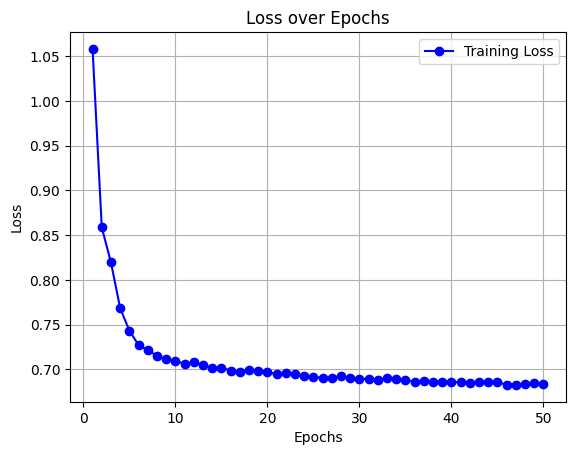

In [28]:

# Gerar gráfico da perda em função das épocas
plt.plot(range(1, num_epochs + 1), loss_values, marker='o', color='b', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()

# Validação do Modelo

In [29]:
# Função para calcular o erro de reconstrução (MSE)
def reconstruction_error(data, recon_data):
    return ((data - recon_data) ** 2).mean(dim=1)

# Função para calcular a acurácia do modelo com base no limiar de erro
def calculate_accuracy(model, test_loader, threshold, true_labels):
    model.eval()  # Coloca o modelo em modo de avaliação
    predictions = []  # Lista para armazenar as predições do modelo

    with torch.no_grad():  # Desativa a autograd para economia de memória
        for data in test_loader:  # Usando o test_loader aqui
            data = data[0].view(-1, input_dim)  # Redimensiona os dados
            recon_data, _, _ = model(data)  # Reconstrói os dados com o modelo

            # Calcula o erro de reconstrução
            errors = reconstruction_error(data, recon_data)
            
            # Classifica como 1 (anômalo) se erro > threshold; 0 (normal) caso contrário
            pred = (errors > threshold).float()
            
            predictions.extend(pred.numpy())

    # Calcula a acurácia
    accuracy = accuracy_score(true_labels, predictions)
    return accuracy

#  limiar (threshold) 
threshold = 0.12# Ajuste o valor do limiar conforme necessário

# Supondo que você tenha rótulos verdadeiros para os dados de teste (y_test)
true_labels = [0] * len(X_test_tensor)  # todos rótulos como 0 (normal)

# Calcule a acurácia usando o DataLoader de teste
accuracy = calculate_accuracy(model, test_loader, threshold, true_labels)
print(f'Acurácia do modelo: {accuracy:.2f}')



Acurácia do modelo: 0.88


In [30]:
import matplotlib.pyplot as plt

# Função para calcular a perda média no teste
def evaluate_model(model, test_loader):
    model.eval()  # Coloca o modelo em modo de avaliação
    total_loss = 0.0
    num_samples = 0

    with torch.no_grad():  # Desativa a autograd para economia de memória
        for data in test_loader:
            data = data[0].view(-1, input_dim)  # Redimensiona os dados
            recon_data, mu, logvar = model(data)  # Reconstrói os dados com o modelo

            # Calcula a perda para o batch atual
            BCE = nn.functional.mse_loss(recon_data, data, reduction='sum')
            KLD = -0.03 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())  

            batch_loss = BCE + KLD
            total_loss += batch_loss.item()


            # Conta o número de amostras no batch
            num_samples += data.size(0)

    # Calcula a perda média por amostra
    mean_loss = total_loss / num_samples

    # Retorna a perda média
    return mean_loss

# Armazenar a perda do teste durante cada época
test_losses = []

# Durante o treinamento, calcule a perda no conjunto de teste a cada época
for epoch in range(num_epochs):
    model.eval()  
    test_loss = evaluate_model(model, test_loader)
    test_losses.append(test_loss)
    print(f'Epoch {epoch + 1} Loss: {test_loss:.4f}')

Epoch 1 Loss: 1.9025
Epoch 2 Loss: 1.9042
Epoch 3 Loss: 1.9027
Epoch 4 Loss: 1.9040
Epoch 5 Loss: 1.9041
Epoch 6 Loss: 1.9035
Epoch 7 Loss: 1.9020
Epoch 8 Loss: 1.9040
Epoch 9 Loss: 1.9041
Epoch 10 Loss: 1.9018
Epoch 11 Loss: 1.9010
Epoch 12 Loss: 1.9040
Epoch 13 Loss: 1.9035
Epoch 14 Loss: 1.9046
Epoch 15 Loss: 1.9031
Epoch 16 Loss: 1.9049
Epoch 17 Loss: 1.9015
Epoch 18 Loss: 1.9039
Epoch 19 Loss: 1.9035
Epoch 20 Loss: 1.9050
Epoch 21 Loss: 1.9011
Epoch 22 Loss: 1.9052
Epoch 23 Loss: 1.9027
Epoch 24 Loss: 1.9025
Epoch 25 Loss: 1.9041
Epoch 26 Loss: 1.9030
Epoch 27 Loss: 1.9026
Epoch 28 Loss: 1.9019
Epoch 29 Loss: 1.9050
Epoch 30 Loss: 1.9042
Epoch 31 Loss: 1.9042
Epoch 32 Loss: 1.9027
Epoch 33 Loss: 1.9032
Epoch 34 Loss: 1.9031
Epoch 35 Loss: 1.9018
Epoch 36 Loss: 1.9014
Epoch 37 Loss: 1.9033
Epoch 38 Loss: 1.9037
Epoch 39 Loss: 1.9031
Epoch 40 Loss: 1.9022
Epoch 41 Loss: 1.9015
Epoch 42 Loss: 1.9010
Epoch 43 Loss: 1.9018
Epoch 44 Loss: 1.9007
Epoch 45 Loss: 1.9029
Epoch 46 Loss: 1.90

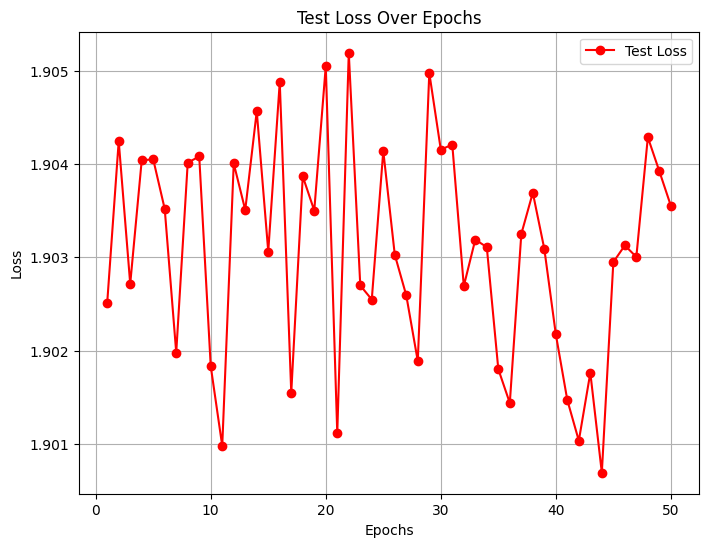

In [31]:
# Gerar gráfico da perda de teste ao longo das épocas
epochs = range(1, num_epochs + 1)

plt.figure(figsize=(8, 6))
plt.plot(epochs, test_losses,'ro-',label='Test Loss')  # Linha vermelha para a perda do teste
plt.title('Test Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()